In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind,chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df=pd.read_csv('churn-bigml-80.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.shape

(2666, 20)

In [4]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [7]:
df.columns.tolist()

['State',
 'Account length',
 'Area code',
 'International plan',
 'Voice mail plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls',
 'Churn']

## Univariate Analysis

In [8]:
numerical_cols=['Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge']
description=df[numerical_cols].describe()
print(description)

       Number vmail messages  Total day minutes  Total day calls  \
count            2666.000000         2666.00000      2666.000000   
mean                8.021755          179.48162       100.310203   
std                13.612277           54.21035        19.988162   
min                 0.000000            0.00000         0.000000   
25%                 0.000000          143.40000        87.000000   
50%                 0.000000          179.95000       101.000000   
75%                19.000000          215.90000       114.000000   
max                50.000000          350.80000       160.000000   

       Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
count       2666.000000        2666.000000      2666.000000       2666.000000   
mean          30.512404         200.386159       100.023631         17.033072   
std            9.215733          50.951515        20.161445          4.330864   
min            0.000000           0.000000         0.000000    

## Analyzing the target variable (Churn)

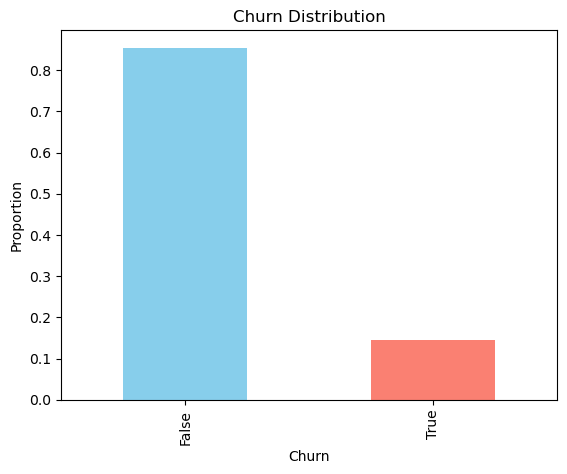

In [9]:
df['Churn'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Proportion')
plt.show()

## Analyzing Categorical Variables:

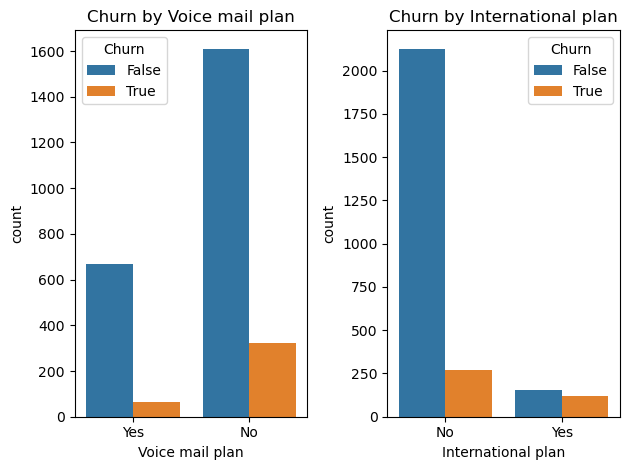

In [10]:
fig,axes=plt.subplots(1,2)

sns.countplot(data=df,x='Voice mail plan',ax=axes[0],hue='Churn')
axes[0].set_title('Churn by Voice mail plan')

sns.countplot(data=df,x='International plan',hue='Churn',ax=axes[1])
axes[1].set_title('Churn by International plan')

plt.tight_layout()
plt.show()

## Result:
- Customers not having a voicemail plan are more likely to churn.
- First of all no. of customers having International plan is quite less also most of the customers having them are churning out.
- Among customers without an international plan, the number of churned customers is very high, simply because this group is mcuh larger overall.

## Analyzing numerical variables:

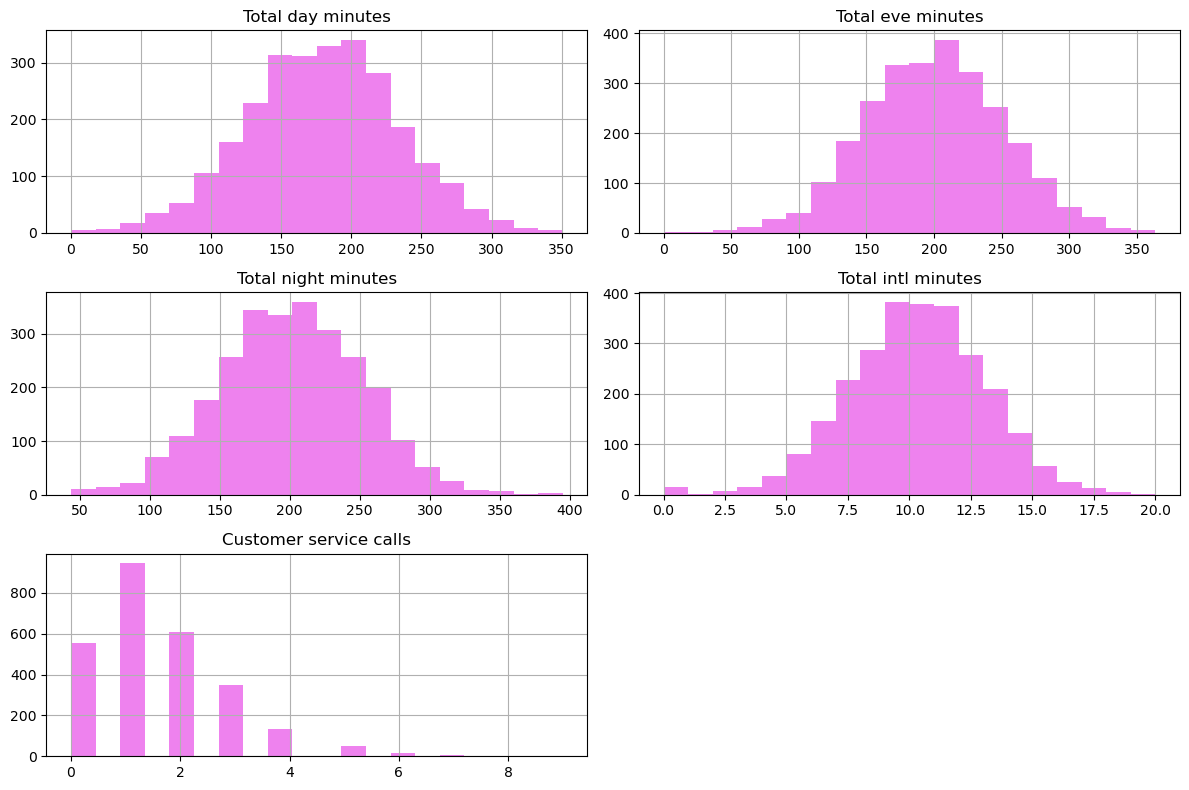

In [11]:
numerical_analysis_1=['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes','Customer service calls']
df[numerical_analysis_1].hist(bins=20, figsize=(12,8), color='violet')
plt.tight_layout()
plt.show()

## Results:
- All the columns here, except 'Customer Service Calls' are approximately normally distributed, forming almost a perfect symmetrical bell like structure.
- The Customer service call column however is highly skewed to the right, meaning most of the customers are getting few or no service calls in a day.

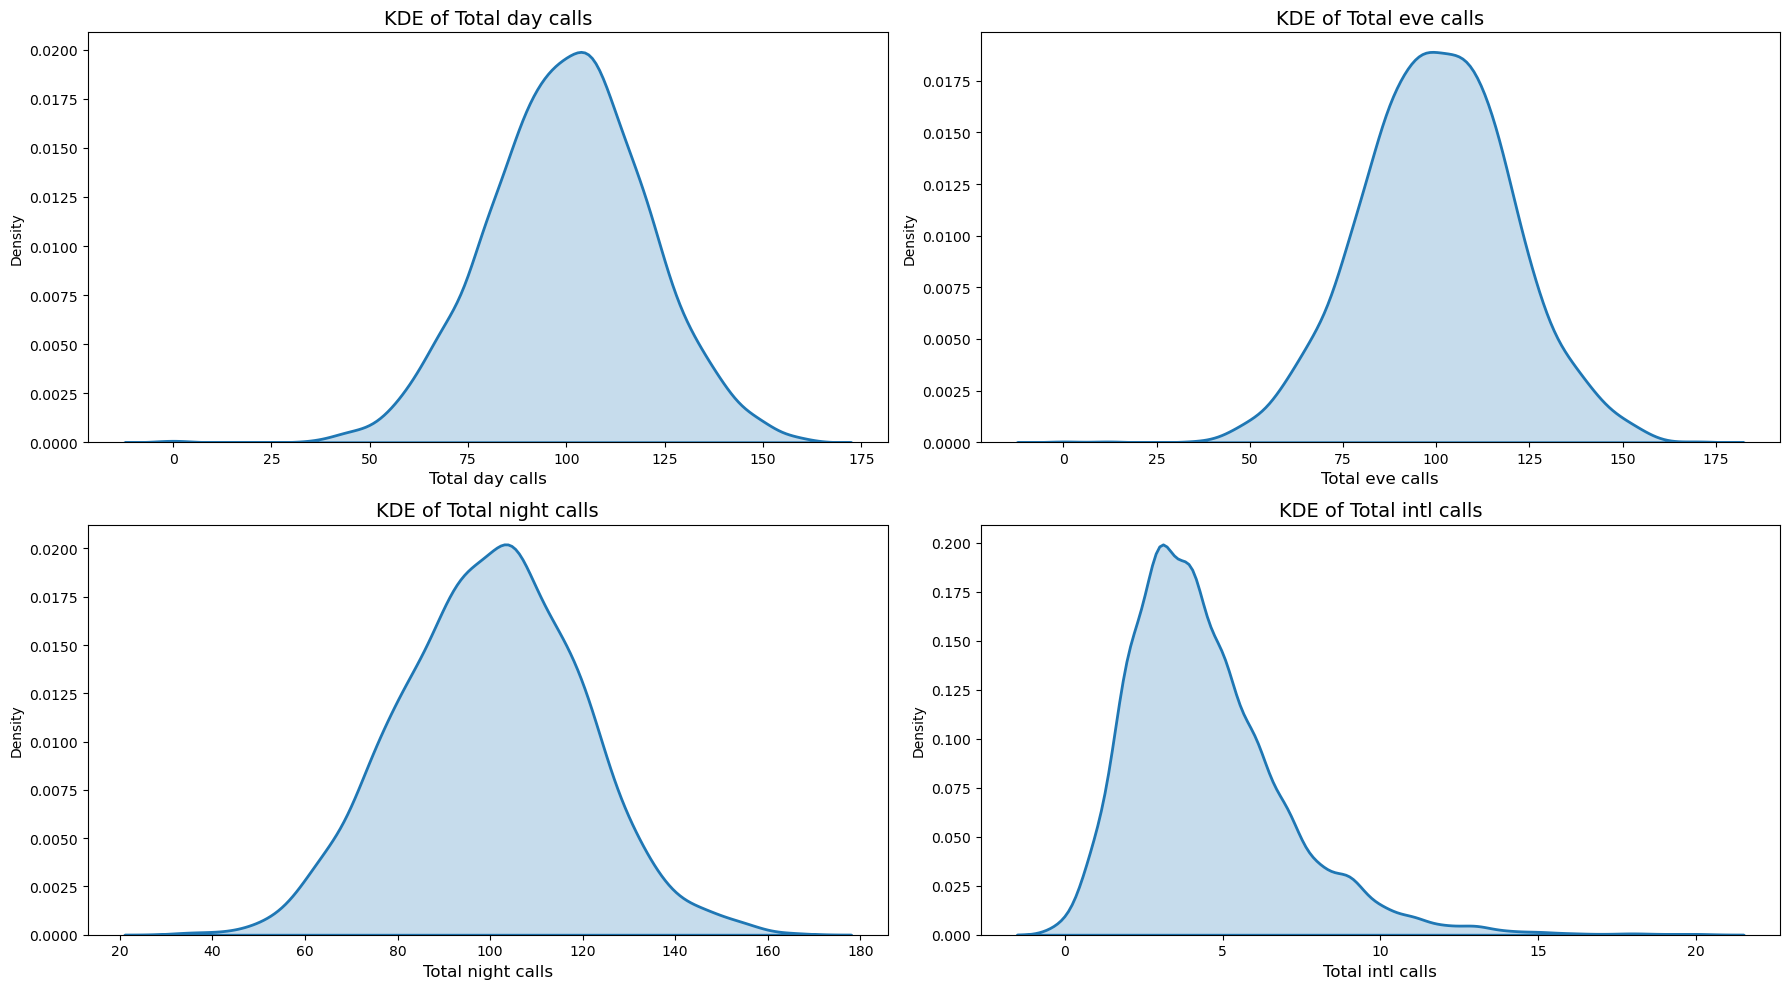

In [12]:
fig,axes=plt.subplots(2,2,figsize=(18,10))
axes=axes.flatten()
numerical_analysis_2=['Total day calls','Total eve calls','Total night calls','Total intl calls']
for i, col in enumerate(numerical_analysis_2):
    if i>=len(axes):
        break
    sns.kdeplot(df[col],fill=True,ax=axes[i],linewidth=2)
    axes[i].set_title(f'KDE of {col}',fontsize=14)
    axes[i].set_xlabel(col,fontsize=12)

plt.tight_layout()
plt.show()

- Usage is Balanced: Daily, evening and night usage are all well-distributed, with clear average usage levels.
- International Use is Low: International call time is generally low for most customers.

## Bivariate Analysis

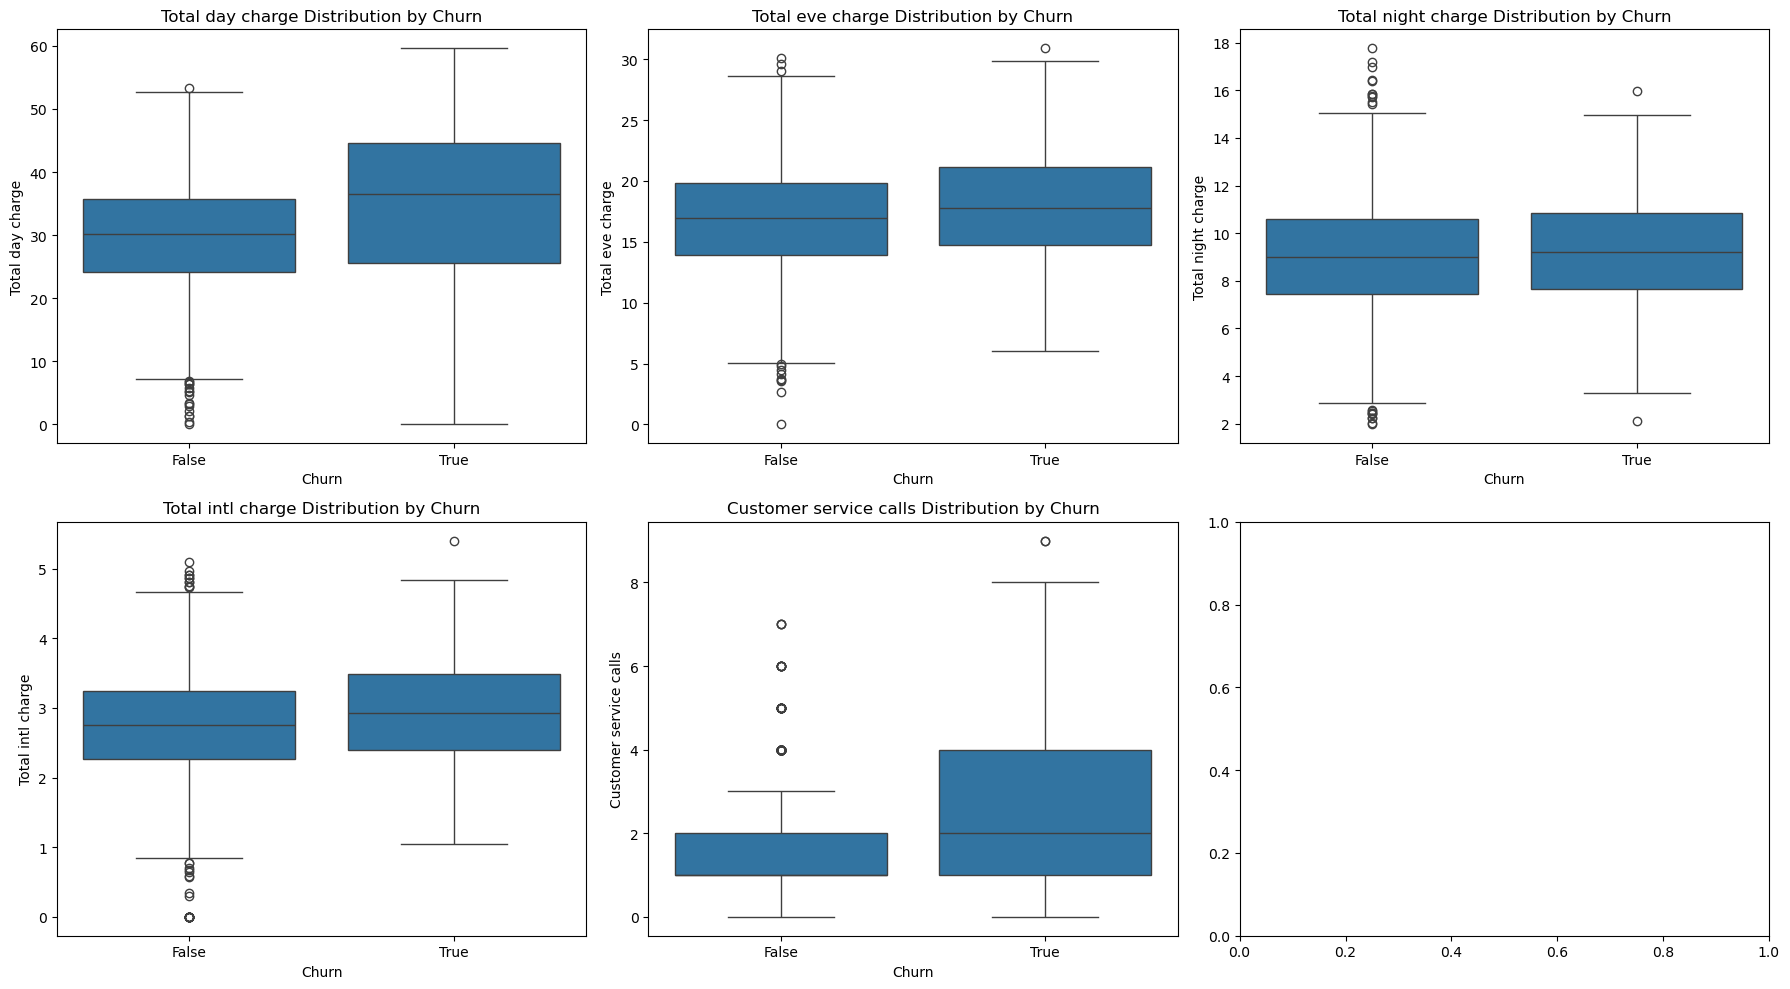

In [13]:
fig,axes=plt.subplots(2,3,figsize=(18,10))
axes=axes.flatten() # Fattens the 2X3 axes array into 1D array for easier iteration.
numerics=['Total day charge','Total eve charge','Total night charge','Total intl charge','Customer service calls']
for i,col in enumerate(numerics):
    if i>=len(axes):
        break
    sns.boxplot(x='Churn',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'{col} Distribution by Churn')
    axes[i].set_ylabel(col)
    
plt.tight_layout()
plt.show()

## Results:
- Total day charge and Customer service calls, these 2 factors majorly affect the churning of customers.
- Other columns like eve charge, night charge, intl charge don't seem to have a major effect on the churning of the customers.

In [14]:
numerical_cols=['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes','Total day charge','Total eve charge','Total night charge','Total intl charge','Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls']
for col in numerical_cols:
    churned_group=df[df['Churn']==True][col].dropna()
    not_churned_group=df[df['Churn']==False][col].dropna()
    t_stat,p_value=ttest_ind(churned_group,not_churned_group,equal_var=False)
    mean_churned=churned_group.mean()
    mean_not_churned=not_churned_group.mean()
    print(f"\n--- {col} ---")
    print(f"Mean (Churned=1): {mean_churned:.2f}")
    print(f"Mean (Not Churned=0): {mean_not_churned:.2f}")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value<0.05:
        print(f'Conclusion: The difference in the mean of {col} between churned and non-churned users is *STATISTICALLY SIGNIFICANT* (p<0.05).')
    else:
        print(f'Conclusion: The difference in the mean of {col} is not statistically significant (p>=0.05).')


--- Total day minutes ---
Mean (Churned=1): 205.18
Mean (Not Churned=0): 175.10
T-statistic: 8.2809, P-value: 0.0000
Conclusion: The difference in the mean of Total day minutes between churned and non-churned users is *STATISTICALLY SIGNIFICANT* (p<0.05).

--- Total eve minutes ---
Mean (Churned=1): 209.39
Mean (Not Churned=0): 198.85
T-statistic: 3.7707, P-value: 0.0002
Conclusion: The difference in the mean of Total eve minutes between churned and non-churned users is *STATISTICALLY SIGNIFICANT* (p<0.05).

--- Total night minutes ---
Mean (Churned=1): 205.31
Mean (Not Churned=0): 200.46
T-statistic: 1.8324, P-value: 0.0674
Conclusion: The difference in the mean of Total night minutes is not statistically significant (p>=0.05).

--- Total intl minutes ---
Mean (Churned=1): 10.82
Mean (Not Churned=0): 10.14
T-statistic: 4.4748, P-value: 0.0000
Conclusion: The difference in the mean of Total intl minutes between churned and non-churned users is *STATISTICALLY SIGNIFICANT* (p<0.05).

--

## Result:
From the T-test we can conclude that columns:
- Total day minutes
- Total eve minutes
- Total intl minutes
- Total day charge
- Total eve charge
- Total intl charge
- Total intl calls
- Customer service calls

These have a strong statistically significant difference between the two groups on every key usage and cost metric.

Meanwhile other columns like
- Total night minutes
- Total night charge
- Total day calls
- Total eve calls
- Total night calls

These don't have a statistically significant difference between the 2 groups.

In [15]:
for col in ['Voice mail plan','International plan','State','Area code']:
    contingency_table=pd.crosstab(df[col],df['Churn'])
    chi2,p_value,dof,expected=chi2_contingency(contingency_table)
    print(f'\n---{col}---')
    print('Contingency Table:')
    print(contingency_table)
    print(f'Chi2 Statistic: {chi2:.4f},P-value:{p_value:.4f}')
    if p_value<0.05:
        print(f'Conclusion: There is a *STATISTICALLY SIGNIFICANT* association between {col} and is_churned (p<0.05).')
    else:
        print(f'Conclusion: There is NO statistically significant association between {col} and is_churned (p>=0.05).')


---Voice mail plan---
Contingency Table:
Churn            False  True 
Voice mail plan              
No                1610    323
Yes                668     65
Chi2 Statistic: 25.6563,P-value:0.0000
Conclusion: There is a *STATISTICALLY SIGNIFICANT* association between Voice mail plan and is_churned (p<0.05).

---International plan---
Contingency Table:
Churn               False  True 
International plan              
No                   2126    270
Yes                   152    118
Chi2 Statistic: 202.6821,P-value:0.0000
Conclusion: There is a *STATISTICALLY SIGNIFICANT* association between International plan and is_churned (p<0.05).

---State---
Contingency Table:
Churn  False  True 
State              
AK        40      3
AL        59      7
AR        36     11
AZ        42      3
CA        19      5
CO        52      7
CT        48     11
DC        40      5
DE        43      8
FL        47      7
GA        41      8
HI        42      2
IA        35      3
ID        51      5
IL 

## Result:
- Here both in 'Voice mail plan' and 'International plan' , the p value is 0.00 which suggests a strong difference between the two churned and non-churned groups.
- 'State' column also has p-value 0.0047 which also shows that it has a strong statistical significant difference between the two groups.

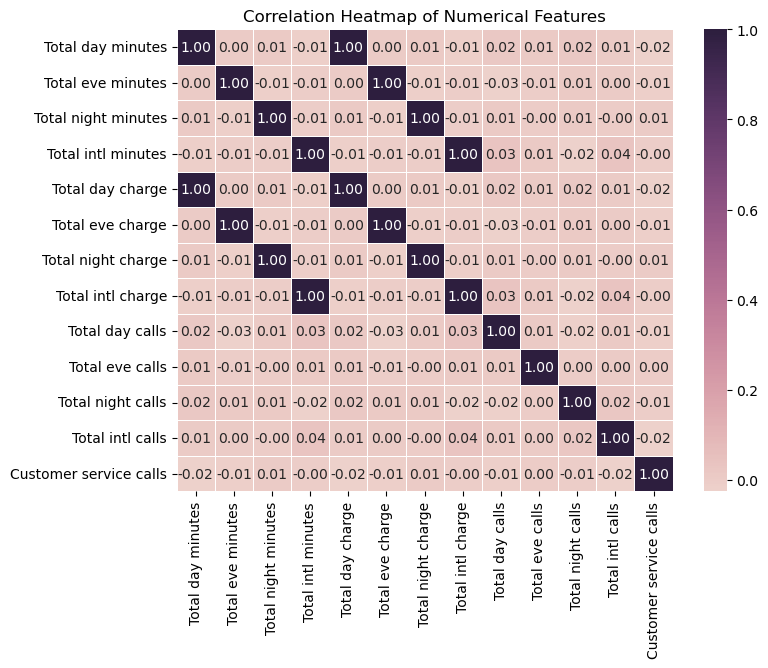

In [16]:
df_numerical = df[numerical_cols]

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Results:
- Here, 'Charge' feature is perfectly correlated with 'Minutes' feature. Hence, are redundant while building model.
- So, we will drop the 'Charge' feature, as it won't affect our model as 'Minutes' feature contains the same information and is sufficient.

## Dropping features which aren't required.

In [17]:
columns_to_drop = [
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge',
    'Total day calls', 'Total eve calls', 'Total night calls', 'Total intl calls',
    'Area code', 'Account length', 'Number vmail messages'
]
df_model=df.drop(columns=columns_to_drop,errors='ignore')

## Adding the Avg. feature which can be more useful

In [18]:
df['Avg day call duration']=(df['Total day minutes']/df['Total day calls']).replace(np.inf,0)

df['Avg evening duration']=(df['Total eve minutes']/df['Total eve calls']).replace(np.inf,0)

df['Avg night duration']=(df['Total night minutes']/df['Total night calls']).replace(np.inf,0)

df['Avg intl duration']=(df['Total intl minutes']/df['Total intl calls']).replace(np.inf,0)

In [19]:
df['Total minutes']=(df['Total day minutes']+ df['Total eve minutes']+df['Total night minutes']+df['Total intl minutes'])

In [20]:
df['Day minutes ratio']=df['Total day minutes']/df['Total minutes']

df['Eve minutes ratio']=df['Total eve minutes']/df['Total minutes']

df['Night minutes ratio']=df['Total night minutes']/df['Total minutes']

## One-hot encoding:

In [21]:
df_model['Churn']=df_model['Churn'].astype(int)

categorical_cols=['International plan','Voice mail plan','State']
df_model=pd.get_dummies(df_model,
                        columns=categorical_cols,
                        drop_first=True)

In [22]:
print(df_model.head())

   Total day minutes  Total eve minutes  Total night minutes  \
0              265.1              197.4                244.7   
1              161.6              195.5                254.4   
2              243.4              121.2                162.6   
3              299.4               61.9                196.9   
4              166.7              148.3                186.9   

   Total intl minutes  Customer service calls  Churn  International plan_Yes  \
0                10.0                       1      0                   False   
1                13.7                       1      0                   False   
2                12.2                       0      0                   False   
3                 6.6                       2      0                    True   
4                10.1                       3      0                    True   

   Voice mail plan_Yes  State_AL  State_AR  ...  State_SD  State_TN  State_TX  \
0                 True     False     False  ...     F

## Defining Feature and Target Variable

In [23]:
X=df_model.drop('Churn',axis=1)
y=df_model['Churn']
print('Feature X shape:',X.shape)
print('Feature Y shape:',y.shape)

Feature X shape: (2666, 57)
Feature Y shape: (2666,)


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                               random_state=42,
                                               stratify=y)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (2132, 57)
X_test shape: (534, 57)


In [30]:
model=RandomForestClassifier(n_estimators=100,
                             random_state=42,
                             class_weight='balanced')
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Making predictions and reporting:

In [33]:
y_pred=model.predict(X_test)
print('\n--- Classification Report ---\n')
print(classification_report(y_test,y_pred))
print('\n--- Confusion Matrix ---\n')
conf_matrix=(confusion_matrix(y_test,y_pred))
print(conf_matrix)


--- Classification Report ---

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       456
           1       0.94      0.58      0.71        78

    accuracy                           0.93       534
   macro avg       0.93      0.79      0.84       534
weighted avg       0.93      0.93      0.93       534


--- Confusion Matrix ---

[[453   3]
 [ 33  45]]
